In [17]:
from selenium import webdriver

chromedrive_path = './chromedriver' # use the path to the driver you downloaded from previous steps
driver = webdriver.Chrome(chromedrive_path)

<ipython-input-17-c194b987a6de>:4: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



In [18]:
url = 'https://www.google.com/maps/place/Chupitos+Shots+Bar/@1.2905784,103.8427723,17z/data=!3m1!5s0x31da19a03c463807:0xb825fcec486a928c!4m7!3m6!1s0x31da19a03d9d6b8d:0x94d4618a8759f376!8m2!3d1.290573!4d103.844961!9m1!1b1'
driver.get(url)

In [19]:
page_content = driver.page_source

In [20]:
from parsel import Selector

response = Selector(page_content)

In [21]:
results = []

for el in response.xpath('//div/div[@data-review-id]/div[contains(@class, "content")]'):
    results.append({
        'title': el.xpath('.//div[contains(@class, "title")]/span/text()').extract_first(''),
        'rating': el.xpath('.//span[contains(@aria-label, "stars")]/@aria-label').extract_first('').replace('stars' ,'').strip(),
        'body': el.xpath('.//span[contains(@class, "text")]/text()').extract_first(''),
    })

print(results)

[{'title': 'Dia Sabrina', 'rating': '4', 'body': "Me and my mates call this the Quirky Shot Bar because it's our go-to bar for quirky fun shots when we're in the area. Their happy hour drinks are good but their 3 for $40 bombs are THEE bomb. Definitely recommend if y'all want to have some fun with drinking & not just spend $$ on your typical Fancy Adult Drinks."}, {'title': 'Soloman Prabu Ravichandran', 'rating': '5', 'body': 'Great service. Was welcomed by Nicole. She’s very friendly and was very welcoming and made sure both me and my gf had a great night. Thank you for having us. See y’all soon 🥳🥳🥳🤩'}, {'title': 'JϟH', 'rating': '2', 'body': 'They have some nice drinks, but the $6per Cup drinks for happy hour are too dilute, as good as drinking juice at that price is not really worth it.'}, {'title': 'Victor Tan', 'rating': '5', 'body': 'The staffs were very nice and friendly. They have an array of very interesting alcohol shots. When you order a half dozen of shot, the bartender wil

In [22]:
import pandas as pd

df = pd.DataFrame(results)
df.dropna()
df['rating'] = pd.to_numeric(df['rating'])
df.head()

,title,rating,body
0,Dia Sabrina,4.0,Me and my mates call this the Quirky Shot Bar ...
1,Soloman Prabu Ravichandran,5.0,Great service. Was welcomed by Nicole. She’s v...
2,JϟH,2.0,"They have some nice drinks, but the $6per Cup ..."
3,Victor Tan,5.0,The staffs were very nice and friendly. They h...
4,Mishal Lemon,2.0,staff are very friendly and approachable and d...


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [24]:
fig = px.histogram(df, x="rating")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Score')
fig.show()

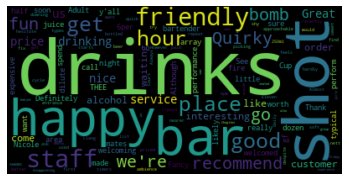

In [25]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))
stopwords.update(["campus", "NUS", "MRT", "looks"])
textt = " ".join(review for review in df['body'])
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [26]:
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# remove score = 3
df = df[df['rating'] != 3]
df['sentiment'] = df['rating'].apply(lambda score : +1 if score > 3.5 else -1)

In [27]:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

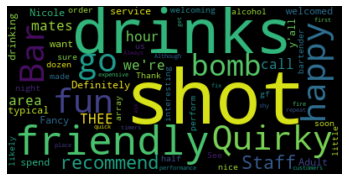

In [28]:
#stopwords = set(stopwords.words('english'))
stopwords.update(["campus", "NUS", "MRT", "good","great"]) 
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive['body'])
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
pos = pos.split()
for word in list(pos):  # iterating on a copy since removing will mess things up
    if word in stopwords:
        pos.remove(word)

from collections import Counter
counts = Counter(pos)

dict_keys(['Me', 'mates', 'call', 'Quirky', 'Shot', 'Bar', 'go-to', 'bar', 'quirky', 'fun', 'shots', "we're", 'area.', 'Their', 'happy', 'hour', 'drinks', '3', '$40', 'bombs', 'THEE', 'bomb.', 'Definitely', 'recommend', "y'all", 'want', 'drinking', '&', 'spend', '$$', 'typical', 'Fancy', 'Adult', 'Drinks.', 'Great', 'service.', 'Was', 'welcomed', 'Nicole.', 'She’s', 'friendly', 'welcoming', 'made', 'sure', 'gf', 'night.', 'Thank', 'us.', 'See', 'y’all', 'soon', '🥳🥳🥳🤩', 'The', 'staffs', 'nice', 'friendly.', 'They', 'array', 'interesting', 'alcohol', 'shots.', 'When', 'order', 'half', 'dozen', 'shot,', 'bartender', 'likely', 'perform', 'little', 'performance', 'fire.', 'Although', 'expensive,', '…', 'Always', 'go', 'place', 'get', 'quick', 'shot', 'fix!', 'Staff', 'first', 'timers', 'repeat', 'customers', 'same!', 'If', 'shy,', 'ask!'])


In [30]:
top_words = counts.most_common(5)
top_words

[('drinks', 3), ('fun', 2), ('happy', 2), ('recommend', 2), ('friendly', 2)]

In [ ]:
neg = " ".join(review for review in negative['body'])
wordcloud3 = WordCloud(stopwords=stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [ ]:
df['sentimentt'] = df['sentimentt'].replace({-1 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [ ]:
score = df['sentimentt'].value_counts()['positive'] / (df['sentimentt'].value_counts()['negative'] + df['sentimentt'].value_counts()['positive']) * 100
score